In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygtc
from sklearn.datasets import load_diabetes
from matplotlib import gridspec
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True

In [2]:
data = np.genfromtxt("./LinearD_RMSD_00004_step_9.601015283527804e-06_dabc_0.0035000000000000005_scale_35_Laplace.txt")
summary = np.genfromtxt("./Sum_4.txt")

(10002, 10)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


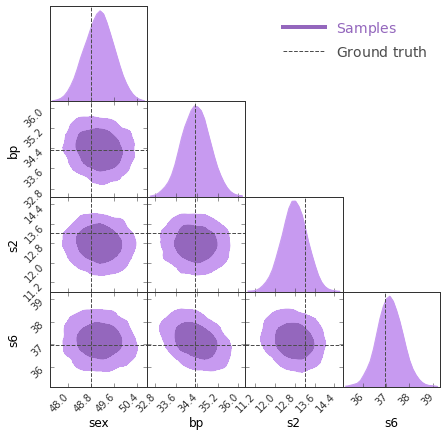

In [3]:
truths = summary[0,:10] 
param = data[1000:,10:20]
print(np.shape(param))
mask = truths != 0
truths = truths[mask]
samples = param[:,mask]
features = np.asarray(load_diabetes().feature_names)[mask]

GTC = pygtc.plotGTC(chains=[samples],
    figureSize='MNRAS_page',
    truths = truths,
    paramNames=features,
    plotName="Chain_RUN01_corner.pdf",
    truthLabels=[r"$\mathrm{Ground\,\, truth}$"],
    legendMarker='All',
    chainLabels=[r"$\mathrm{Samples}$"],
#    labelRotation=(0,0),
#    truthColors=["#FF0000"],
    truthLineStyles=["--"],
    customLegendFont={'family':'Arial', 'size':14},
    customTickFont={'family':'Arial', 'size':10},
    colorsOrder=["purples"],
    customLabelFont={'family':'Arial', 'size':12}
    )


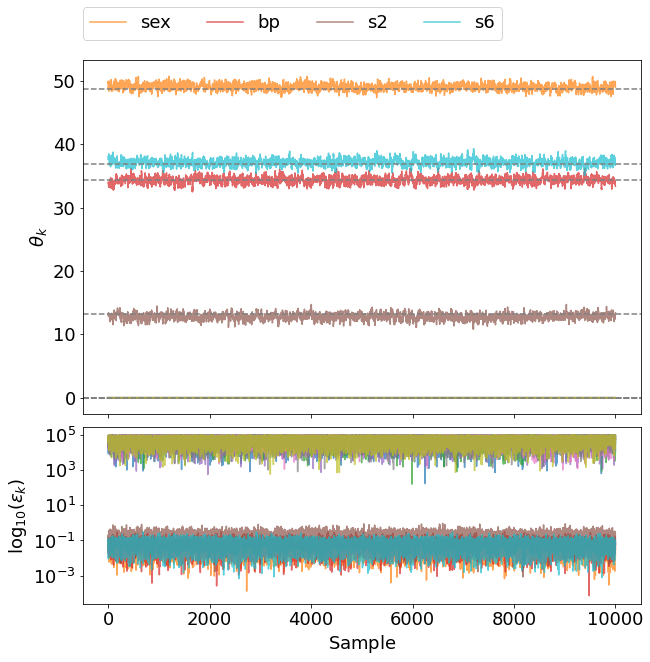

In [10]:

fig = plt.figure(figsize=(10,10))
# set height ratios for subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the first subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
#ax0.set_yscale("log")
for i in range(10):
    if i in np.arange(10)[mask]:
        li = np.asarray(load_diabetes().feature_names)[i]
        ax0.plot(data[1002:,10+i],alpha=0.7,label=li)
    else:
        ax0.plot(data[1002:,10+i],alpha=0.7)
    ax0.axhline(y=summary[0,i],linestyle="--",color="grey")

plt.legend(bbox_to_anchor=(0, 1.15), ncol =7,  loc=2, borderaxespad=0.,fontsize=18)
plt.xticks(size=18,visible=False)
plt.yticks(size=18)
plt.ylabel(r"$\theta_k$",fontsize=18)
    
# the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
for i in range(10):
    plt.plot(data[1002:,i],alpha=0.7)
ax1.set_yscale("log")

# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel(r"$\log_{10}(\epsilon_k)$",fontsize=18)
plt.xlabel(r"$\mathrm{Sample}$",fontsize=18)

# put legend on first subplot

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.05)
plt.savefig("Chain_RUN01_convergence.pdf",bbox_inches='tight')
plt.show()
